<a href="https://colab.research.google.com/github/IreneMNS/FAST-API-CAPSTONE/blob/main/FINAL_PROJECT_MEALYSTICS_CAPSTONE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Segmentasi Pelanggan Menggunakan Metode Unsupervised Learning Meningkatkan Engagements Waroenk Kangmas.**

### **Studi Kasus**

Mitra yang bekerja sama dengan kami adalah sebuah warung makan yang terletak di dekat area Universitas Mulawarman, tepatnya pada Jalan Pramuka 6. Mitra tersebut adalah Waroenk Kangmas, sebuah tempat makan yang menyajikan berbagai macam menu dengan harga terjangkau khusus bagi Mahasiswa/i yang merupakan anak kosan. Mitra ini adalah UMKM yang telah berdiri sejak 2023 yang didirikan oleh tiga orang. Kami menemukan bahwa Mitra tersebut memiliki permasalahan pada pencapaian target pemasukan warung makan mereka. Selain itu juga mitra tersebut memiliki permasalahan dalam mencapai audiensi, dikarenakan lokasi mitra yang terletak cukup di ujung Jalan terlebih lokasi mitra tersebut dibuka di halaman rumah yang tertutup sehingga banyak orang tidak sadar akan lokasi mitra tersebut.


# **Import Library**

In [ ]:
from google.colab import userdata
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tabulate import tabulate

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

!pip install scikit-learn --upgrade

# **Business Understanding**

### **Business Objective**

Berdasarkan observasi yang telah kami lakukan serta melakukan wawancara dengan pihak mitra terkait kami menemukan bahwasanya pihak mitra mengalami kendala dalam pencapaian target pemasukan di sebabkan oleh visibiltas lokasi yang kurang strategis serta belum adanya sistem yang dapat mengamati pengelompokan perilaku pelanggan. Oleh karena itu, tujuan bisnis dari proyek ini adalah membangun sistem analitik berbasis data yang dapat membantu perilaku pelanggan, meningkatkan efektivitas strategi promosi.

### **Assess Situation**

Dalam memahami situasi ini kami menemukan bahwa mitra memiliki data transaksi yang cukup kaya untuk dianalisis, mencakup tanggal pembelian, metode pembayaran (seperti cash, QRIS, dan debit), serta nilai transaksi. Dari data awal terlihat bahwa metode pembayaran non-tunai, khususnya QRIS, cukup dominan digunakan terutama oleh para mahasiswa, yang menunjukkan adanya pola perilaku pembelian yang dapat dijadikan dasar untuk segmentasi pelanggan. Meskipun demikian, data yang dimiliki tidak mencakup identitas pelanggan, sehingga analisis akan difokuskan pada perilaku transaksi, bukan demografi individu. Selain itu, keterbatasan lokasi dan belum adanya sistem digital atau platform pemasaran daring menjadi tantangan sekaligus peluang untuk diterapkannya pendekatan digital dan teknologi berbasis sistem informasi. Mitra terbuka terhadap penggunaan website dan dashboard visualisasi sebagai media untuk memahami hasil analisis, sekaligus sebagai alat bantu promosi berbasis data.

### **Data Mining Goals**

Output dari proyek ini adalah mendapatkan insight yang dapat bertujuan membangun model segmentasi pelanggan dengan pendekatan Unsupervised Learning dengan metode Clustering yang dibekali juga dengan algoritma K - MEANS dan Hierarchical Clustering.

Segmentasi ini akan didasarkan pada datasets perilaku konsumen terutama segmentasi transaksi dalam meningkatkan engagements mitra tersebut. Dimulai dari perilaku transaksasi yang didominasi metode Qris dan Cash, yang mengarah juga pada segmen tertentu seperti mahasiswa akhir bulan yang mencari makanan murah, segmen pekerja kantoran yang kebanyakan membayar lewat Debit. Dengan pengenalan perilaku setiap segmen mitra dapat menyusun strategi pemasaran yang lebih tepat sasaran sekaligus meningkatkan engagements mereka.

### **Project Plan**

Proyek ini dirancang untuk berjalan dalam beberapa tahap strategis. Pertama-tama, dilakukan pendalaman terhadap konteks bisnis dan kebutuhan mitra untuk merumuskan arah analisis yang tepat. Selanjutnya, dilakukan eksplorasi terhadap data transaksi yang tersedia, dilanjutkan dengan tahapan persiapan data seperti pembersihan dari nilai kosong, duplikat, dan pencilan, serta transformasi data agar siap digunakan dalam pemodelan. Pada tahap modeling, algoritma K-Means digunakan untuk membentuk klaster pelanggan berdasarkan pola numerik, sementara Hierarchical Clustering dipilih untuk memperkuat pemahaman terhadap struktur hirarki segmen, terutama yang berkaitan dengan metode pembayaran atau preferensi menu.

# **Data Understanding**

### **Collect Initial Data**

Sumber data yang digunakan berasal dari mitra waroenk KANGMAS yang di berikan oleh seorang pemilik mitra waroenk KANGMAS yang juga bekerja di waroenk KANGMAS pramuka samarinda. Data yang dipakai merupakan data private.

In [ ]:
df = pd.read_csv('/content/WAROENKM.csv')
df.head()

,StoreName,Mid,Tid,CashierName,TransactionID,TransactionDate,Subtotal,Tax,Charge,Discount,...,PaymentMethod,Status,Approval,RefID,CardType,CardBank,SettlementStatus,SettlementDate,MemberName,QRStatisName
0,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRKQI935WAS011100432,2024-11-01 10:23:34,23000,0,0,0,...,QRIS,success,073626404648,1.427205e+09,NaN,NaN,settled,2024-11-01 20:48:18,NaN,NaN
1,WAROENK KANGMAS,1999437179,10736264,Yoga,PCA8QC935WAS011100433,2024-11-01 10:25:49,88000,0,0,0,...,Cash,success,NaN,NaN,NaN,NaN,unsettled,NaN,NaN,NaN
2,WAROENK KANGMAS,1999437179,10736264,Yoga,PQREFC935WAS011100434,2024-11-01 11:16:04,30000,0,0,0,...,QRIS,success,073626404654,1.427289e+09,NaN,NaN,settled,2024-11-01 20:48:18,NaN,NaN
3,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR5RQ935WAS011100435,2024-11-01 11:18:23,15000,0,0,0,...,QRIS,success,073626404658,1.427293e+09,NaN,NaN,settled,2024-11-01 20:48:18,NaN,NaN
4,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR19L935WAS011100436,2024-11-01 11:19:00,18000,0,0,0,...,QRIS,success,073626404661,1.427294e+09,NaN,NaN,settled,2024-11-01 20:48:18,NaN,NaN


### **Describe Data**

##### **Informasi Kolom**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StoreName         3446 non-null   object 
 1   Mid               3446 non-null   int64  
 2   Tid               3446 non-null   int64  
 3   CashierName       3446 non-null   object 
 4   TransactionID     3446 non-null   object 
 5   TransactionDate   3446 non-null   object 
 6   Subtotal          3446 non-null   int64  
 7   Tax               3446 non-null   int64  
 8   Charge            3446 non-null   int64  
 9   Discount          3446 non-null   int64  
 10  Total             3446 non-null   int64  
 11  PaymentMethod     3446 non-null   object 
 12  Status            3446 non-null   object 
 13  Approval          1338 non-null   object 
 14  RefID             1338 non-null   float64
 15  CardType          22 non-null     object 
 16  CardBank          22 non-null     object 


Dataset ini memiliki 3450 baris dan 21 kolom dengan tipe data seluruhnya berupa object, yang umumnya merepresentasikan data teks; setiap kolom menyimpan informasi berbeda seperti identitas toko, transaksi, kasir, hingga metode pembayaran. Berikut rincian tiap kolomnya:

Store Name          : Nama toko, 3450 entri, object

Mid                 : ID merchant, 3450 entri, object

Tid                 : ID terminal, 3450 entri, object

Cashier Name        : Nama kasir, 3450 entri, object

Transaction ID      : ID transaksi, 3450 entri, object

Transaction Date    : Tanggal transaksi, 3450 entri, object

Subtotal            : Nilai subtotal transaksi, 3450 entri, object

Tax                 : Nilai pajak transaksi, 3450 entri, object

Charge              :  Biaya tambahan, 3450 entri, object

Discount            : Diskon transaksi, 3450 entri, object

Total               : Total akhir transaksi, 3450 entri, object

Payment Method      : Metode pembayaran, 3450 entri, object

Status              : Status transaksi, 3450 entri, object

Approval            : Kode persetujuan (jika ada), 1342 entri, object

Ref ID              : ID referensi (biasanya dari bank), 1342 entri, object

Card Type           : Jenis kartu (debit/kredit), 26 entri, object

Card Bank           : Bank penerbit kartu, 26 entri, object

Settlement Status   : Status settlement, 3450 entri, object

Settlement Date     : Tanggal settlement, 1342 entri, object

Member Name         : Nama member (jika ada), 4 entri, object

QR Statis Name      : Nama QR statis (jika ada), 4 entri, object

##### **Statistika Deskriptif**

In [ ]:
df.describe()

,Mid,Tid,Subtotal,Tax,Charge,Discount,Total,RefID,MemberName,QRStatisName
count,3.446000e+03,3446.0,3.446000e+03,3446.0,3446.0,3446.000000,3.446000e+03,1.338000e+03,0.0,0.0
mean,1.999437e+09,10736264.0,3.440571e+04,0.0,0.0,25.885084,3.437982e+04,1.498668e+09,NaN,NaN
std,0.000000e+00,0.0,1.003467e+05,0.0,0.0,893.246886,1.003359e+05,2.120210e+08,NaN,NaN
min,1.999437e+09,10736264.0,6.000000e+00,0.0,0.0,0.000000,6.000000e+00,1.100000e+01,NaN,NaN
25%,1.999437e+09,10736264.0,1.700000e+04,0.0,0.0,0.000000,1.700000e+04,1.455687e+09,NaN,NaN
50%,1.999437e+09,10736264.0,2.500000e+04,0.0,0.0,0.000000,2.500000e+04,1.489856e+09,NaN,NaN
75%,1.999437e+09,10736264.0,3.700000e+04,0.0,0.0,0.000000,3.700000e+04,1.601021e+09,NaN,NaN
max,1.999437e+09,10736264.0,2.600000e+06,0.0,0.0,50000.000000,2.600000e+06,1.664453e+09,NaN,NaN



*   **Store Name**:
unique: 2 | top: WAROENK KANGMAS | freq: 3446
Berdasarkan data, terdapat 2 nama toko dalam dataset ini, di mana toko yang paling sering muncul adalah WAROENK KANGMAS dengan total 3446 transaksi.

*   **Cashier Name**:
unique: 2 | top: Yoga | freq: 3446
Terdapat 2 nama kasir yang tercatat, dan kasir Yoga menjadi yang paling dominan, menangani 3446 dari 3450 transaksi.

*   **Subtotal**:
unique: 134 | top: 15000 | freq: 428
Terdapat 134 nilai subtotal berbeda, dengan nilai paling umum adalah 15000, yang muncul sebanyak 428 kali dalam transaksi.

*   **Tax**:
unique: 2 | top: 0 | freq: 3446
Diketahui bahwa nilai pajak dalam hampir semua transaksi adalah 0, hanya sedikit transaksi yang dikenakan pajak.

*   **Charge**:
unique: 2 | top: 0 | freq: 3446
Sama seperti pajak, mayoritas transaksi tidak memiliki biaya tambahan, dengan nilai 0 muncul sebanyak 3446 kali.

*    **Discount**:
unique: 10 | top: 0 | freq: 3434
Diskon jarang diberikan, terlihat dari 3434 transaksi yang tidak mendapatkan potongan harga (diskon = 0).

*   **Payment Method**:
unique: 6 | top: Cash | freq: 2108
Metode pembayaran yang digunakan terdiri dari 6 jenis, namun Cash adalah yang paling dominan, digunakan dalam 2108 transaksi.

*    **Status**:
unique: 2 | top: success | freq: 3446
Mayoritas transaksi dalam dataset ini berhasil (status = success), yaitu sebanyak 3446 dari 3450 transaksi.

*   **Card Type**:
unique: 3 | top: Debit | freq: 21
Dari total transaksi, hanya 26 yang menggunakan kartu, dan dari transaksi tersebut, Debit adalah jenis kartu yang paling banyak digunakan.

*   **Card Bank**:
unique: 3 | top: BRI | freq: 13
Bank yang paling sering muncul dalam transaksi kartu adalah BRI, dengan total 13 kali dari 26 transaksi berbasis kartu.

*   **Settlement Status**:
unique: 3 | top: unsettled | freq: 2108
Terdapat 3 jenis status penyelesaian transaksi, di mana unsettled paling dominan, muncul dalam 2108 transaksi.

*   **Member Name**:
unique: 1 | freq: 4
Hanya ada 4 transaksi yang melibatkan nama member, menunjukkan bahwa fitur keanggotaan jarang digunakan.

*   **QR Statis Name**:
unique: 1 | freq: 4
Mirip seperti member, QR statis hanya muncul pada 4 transaksi, menandakan penggunaannya masih sangat terbatas.

### **Exploratory Data Analysis**

##### **Distribution**

In [ ]:
print(df.columns)

Index(['StoreName', 'Mid', 'Tid', 'CashierName', 'TransactionID',
       'TransactionDate', 'Subtotal', 'Tax', 'Charge', 'Discount', 'Total',
       'PaymentMethod', 'Status', 'Approval', 'RefID', 'CardType', 'CardBank',
       'SettlementStatus', 'SettlementDate', 'MemberName', 'QRStatisName'],
      dtype='object')


In [ ]:
print(df['Total'].describe())

count    3.446000e+03
mean     3.437982e+04
std      1.003359e+05
min      6.000000e+00
25%      1.700000e+04
50%      2.500000e+04
75%      3.700000e+04
max      2.600000e+06
Name: Total, dtype: float64


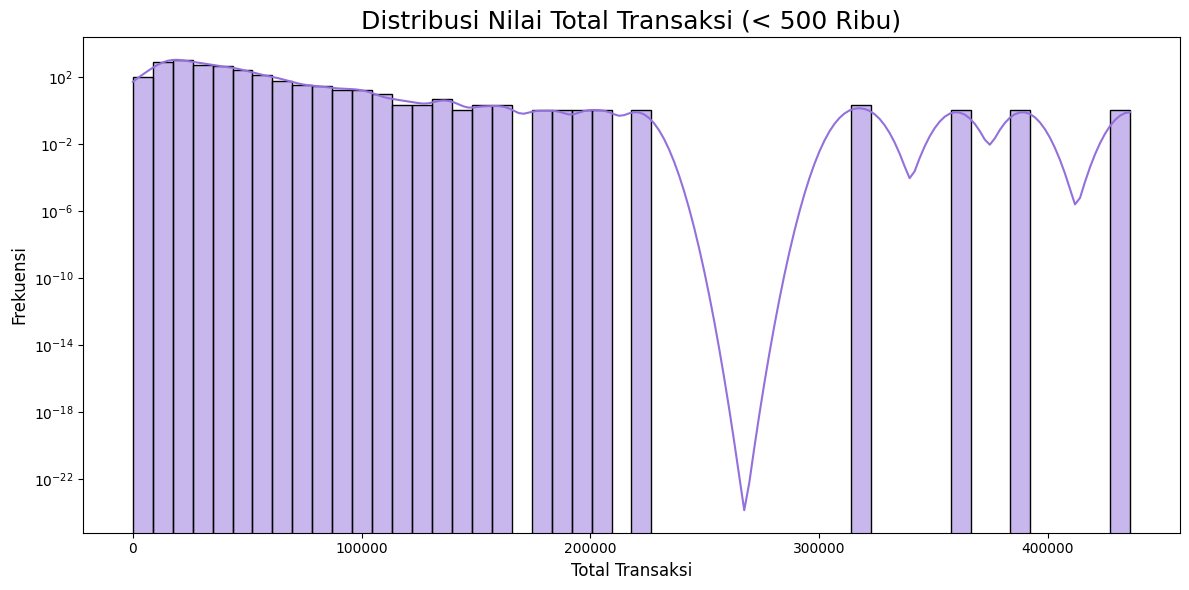

In [ ]:
# Batasi nilai total transaksi agar tidak terdistorsi oleh outlier
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Total'] < 500_000]['Total'], bins=50, kde=True, color='mediumpurple')

plt.yscale('log')
plt.title('Distribusi Nilai Total Transaksi', fontsize=18)
plt.xlabel('Total Transaksi', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Nilai Total Transaksi (< 500 Ribu)', fontsize=18)
plt.tight_layout()
plt.show()


1. **Histogram (batang biru)**: Menunjukkan seberapa sering suatu nilai total transaksi muncul dalam data. Semakin tinggi batangnya, berarti ada lebih banyak transaksi dengan nilai total tersebut. Batang-batang ini lebih banyak di sisi kiri, menunjukkan bahwa sebagian besar transaksi memiliki nilai total yang lebih rendah.

2. **Kurva distribusi (garis biru)**: Ini adalah representasi halus dari histogram, yang menggambarkan pola keseluruhan distribusi transaksi. Kurva ini lebih rendah di sisi kanan, menunjukkan bahwa transaksi dengan nilai total yang lebih tinggi jarang terjadi.

Secara keseluruhan, grafik ini mengilustrasikan bahwa sebagian besar transaksi memiliki nilai yang kecil, sedangkan transaksi dengan nilai besar lebih jarang.

##### **Composition**

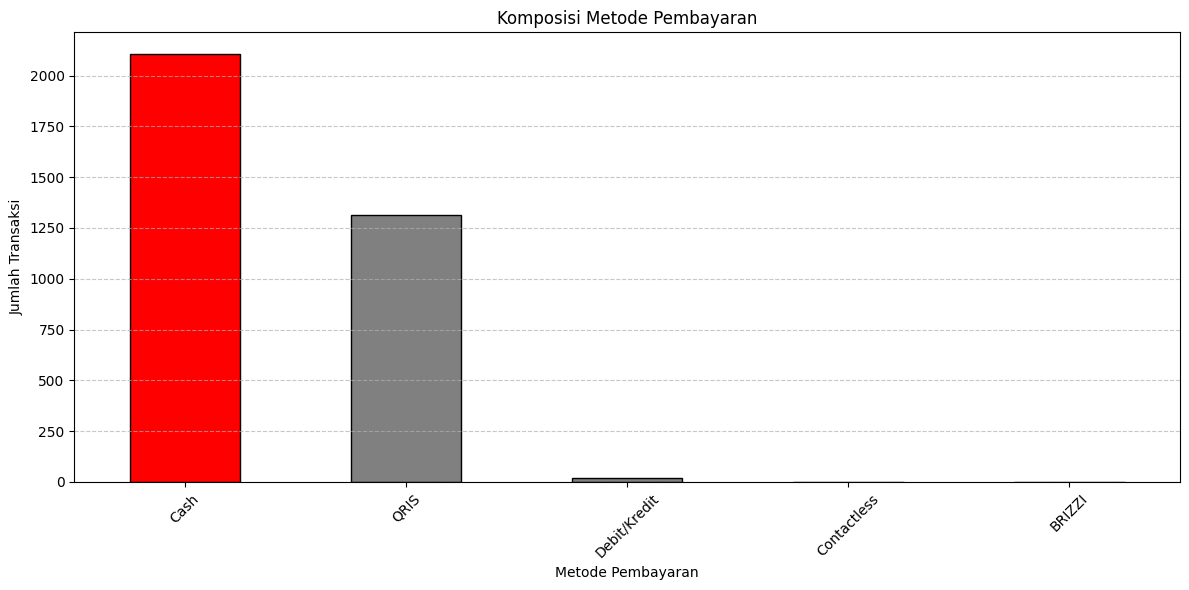

In [ ]:
# Hitung value counts
payment_counts = df['PaymentMethod'].value_counts()

# Ambil nama metode pembayaran paling banyak digunakan
most_used_method = payment_counts.idxmax()

# Warna: merah untuk paling banyak, lainnya biru muda
colors = ['red' if method == most_used_method else 'gray' for method in payment_counts.index]

# Plot bar chart
plt.figure(figsize=(12, 6))
payment_counts.plot.bar(color=colors, edgecolor='black')
plt.title('Komposisi Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Grafik ini menunjukkan *komposisi metode pembayaran* yang digunakan dalam transaksi. Ada dua bagian utama:

1. Cash (Tunai): Bagian biru ini mewakili transaksi yang dibayar dengan uang tunai. Sekitar 61.1% dari transaksi menggunakan metode ini, yang artinya lebih dari setengahnya.

2. QRIS: Bagian oranye ini mewakili transaksi yang dibayar menggunakan QRIS (QR Code Indonesian Standard). Sekitar 38.1% transaksi menggunakan QRIS, lebih sedikit dibandingkan uang tunai.

Ada juga label yang menunjukkan 0% untuk metode pembayaran lainnya, yang sangat kecil.

Dengan kata lain, sebagian besar orang lebih suka membayar menggunakan uang tunai, sementara sebagian lainnya menggunakan QRIS.

##### **Relationship**

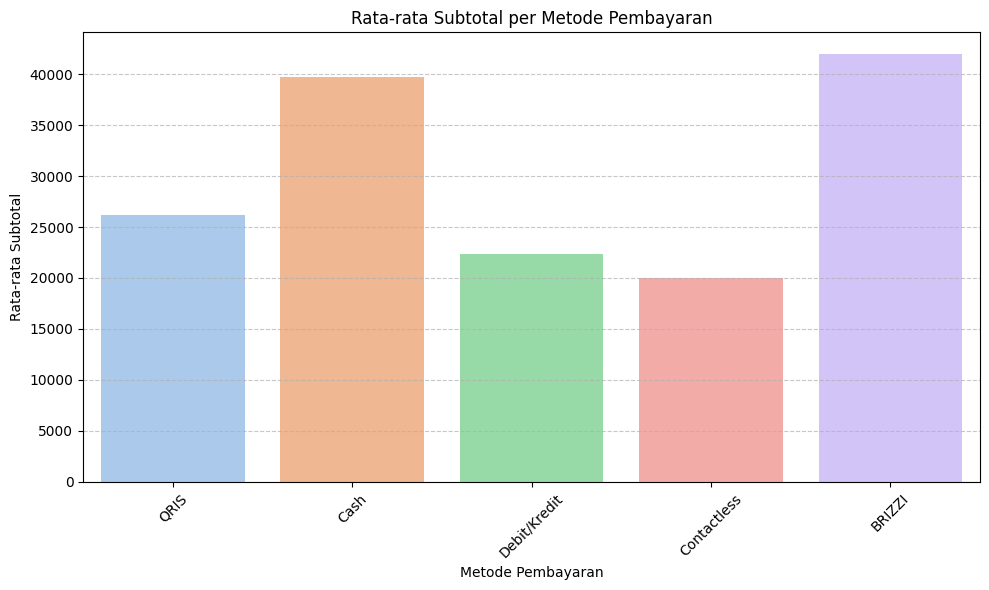

In [ ]:
# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='PaymentMethod', y='Subtotal', estimator='mean', ci=None, palette='pastel') # Changed x='PaymentMethod' to x='Payment Method', df_temp to df
plt.title('Rata-rata Subtotal per Metode Pembayaran')
plt.xticks(rotation=45)
plt.ylabel('Rata-rata Subtotal')
plt.xlabel('Metode Pembayaran')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Grafik ini adalah *scatter plot* yang menunjukkan hubungan antara *Subtotal* (nilai barang sebelum pajak) dan *Total* (total yang harus dibayar setelah pajak dan biaya lain). Titik-titik di grafik ini dibedakan dengan warna berdasarkan metode pembayaran, yaitu:

* *QRIS* (titik biru)
* *Cash* (titik oranye)
* *Debit/Kredit* (titik hijau)
* *Contactless* (titik merah)
* *BRIZZI* (titik ungu)

Dari grafik ini, kita bisa lihat bahwa *semakin besar Subtotal, semakin besar Total-nya* (terlihat dari garis menurun di grafik). Ini artinya ada hubungan langsung antara harga barang dan jumlah yang dibayar.

Titik-titik dengan metode *Cash* (oranye) lebih banyak ditemukan di bagian Subtotal yang lebih kecil, sementara *QRIS* (biru) terlihat lebih banyak di bagian *Subtotal yang lebih besar*. Ini menunjukkan bahwa orang yang membayar dengan uang tunai cenderung membeli barang dengan harga lebih rendah, sedangkan mereka yang menggunakan QRIS mungkin membeli lebih banyak barang.

##### **Comparison**

In [ ]:
# Replace 'TransactionDate' with the correct column name
pd.to_datetime(df['TransactionDate'], errors='coerce', format='mixed')

,TransactionDate
0,2024-11-01 10:23:34
1,2024-11-01 10:25:49
2,2024-11-01 11:16:04
3,2024-11-01 11:18:23
4,2024-11-01 11:19:00
...,...
3441,2025-03-27 19:33:24
3442,2025-03-27 19:43:43
3443,2025-03-27 20:14:04
3444,2025-03-27 20:30:26


Berdasarkan hasil output di atas, dapat disimpulkan bahwa rentang waktu transaksi dalam dataset dimulai dari tanggal 1 November 2024 hingga 27 Maret 2025. Ini menunjukkan bahwa data mencakup periode transaksi selama hampir lima bulan. Informasi ini penting dalam proses analisis karena dapat digunakan untuk memahami pola musiman, tren harian atau mingguan, serta mengevaluasi performa penjualan dalam jangka waktu tertentu.

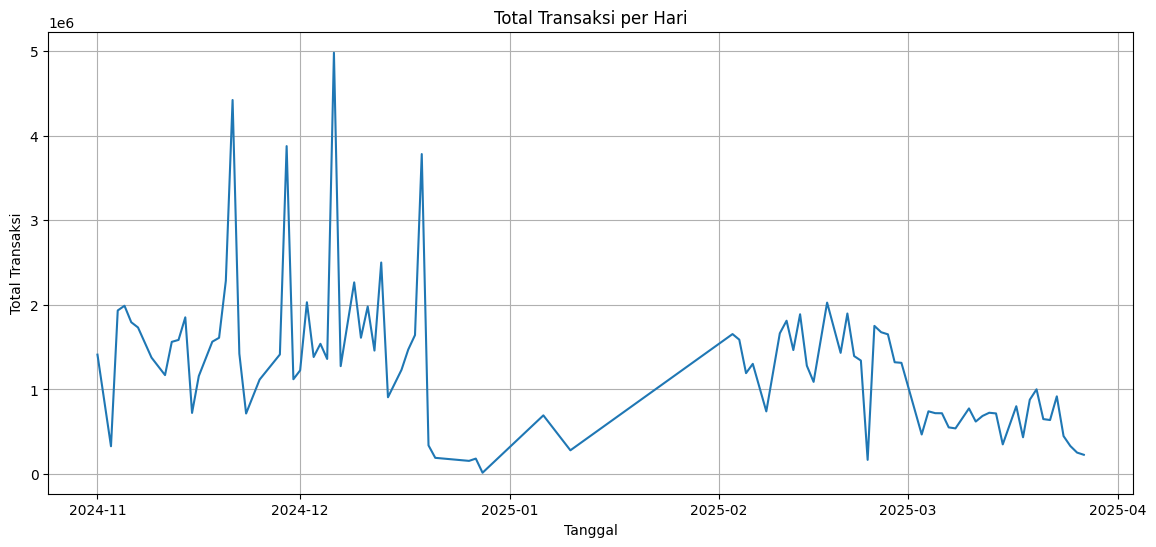

In [ ]:
# Replace 'TransactionDate' with the correct column name 'Transaction Date'
pd.to_datetime(df['TransactionDate'], errors='coerce', format='mixed')
# Buang baris yang mengandung header duplikat atau string aneh
df = df[df['TransactionDate'] != 'TransactionDate']

# Konversi kolom tanggal
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Pastikan kolom Total adalah numerik
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Buang baris dengan tanggal atau total kosong
df_clean = df.dropna(subset=['TransactionDate', 'Total'])

# Kelompokkan dan jumlahkan total per tanggal
daily_total = df_clean.groupby(df_clean['TransactionDate'].dt.date)['Total'].sum()

# Visualisasi
plt.figure(figsize=(14, 6))
daily_total.plot()
plt.title('Total Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Transaksi')
plt.grid(True)
plt.show()

Grafik ini menunjukkan total transaksi per hari dalam rentang waktu tertentu. Garis di grafik ini menggambarkan jumlah total uang yang dibelanjakan setiap hari.

Beberapa hal yang bisa dilihat dari grafik:

* Pada bulan Desember 2024, ada lonjakan besar dalam total transaksi, terlihat dengan puncak yang tinggi dan sering.
* Setelah itu, ada penurunan yang terlihat di awal 2025 dengan fluktuasi yang lebih kecil.
* Grafik ini memperlihatkan adanya *variasi harian* dalam transaksi, yang bisa dipengaruhi oleh banyak faktor, seperti waktu liburan atau perubahan pola belanja.

### **Verify Data Quality**

##### **Missing Values**

In [ ]:
print(df.isnull().sum())

StoreName              0
Mid                    0
Tid                    0
CashierName            0
TransactionID          0
TransactionDate        0
Subtotal               0
Tax                    0
Charge                 0
Discount               0
Total                  0
PaymentMethod          0
Status                 0
Approval            2108
RefID               2108
CardType            3424
CardBank            3424
SettlementStatus       0
SettlementDate      2108
MemberName          3446
QRStatisName        3446
dtype: int64


Berdasarkan hasil output di atas, dapat disimpulkan bahwa sebagian besar kolom dalam dataset tidak memiliki nilai yang hilang (missing value), seperti Store Name, Mid, Tid, Cashier Name, Transaction ID, Transaction Date, Subtotal, Tax, Charge, Discount, Total, Payment Method, Status, dan Settlement Status. Namun, terdapat beberapa kolom yang memiliki jumlah missing value cukup signifikan, seperti:

*   *Approval*, *Ref ID*, dan *Settlement Date* masing-masing memiliki 2.108 nilai kosong, menunjukkan bahwa sekitar 61% transaksi tidak menyertakan informasi ini—kemungkinan besar karena tidak semua metode pembayaran membutuhkan persetujuan atau referensi.

*   *Card Type* dan *Card Bank* memiliki 3.424 nilai kosong, menandakan bahwa hanya sebagian kecil transaksi yang dilakukan menggunakan kartu.

*   *Member Name* dan *QR Statis Name* memiliki 3.446 nilai kosong, hampir seluruh datanya kosong, yang mengindikasikan bahwa hampir semua transaksi tidak terkait dengan member atau penggunaan QR statis.

##### **Outliers Values**

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers, lower, upper

# Panggil fungsi buat kolom 'Total'
outliers, lower, upper = detect_outliers_iqr(df, 'Total')

Berdasarkan hasil pengecekan outlier menggunakan metode IQR (Interquartile Range) pada kolom Total, tidak ditemukan data yang berada di luar batas bawah (lower bound) maupun batas atas (upper bound). Artinya, semua nilai pada kolom tersebut berada dalam rentang yang wajar dan tidak ada nilai ekstrem yang dapat dianggap sebagai outlier.

##### **Duplicated Values**

In [ ]:
df.duplicated().sum()

np.int64(0)

Diperlihatkan bahwa data kami tidak memiliki duplicate

##### **Inconsistent Values/Noise**

In [ ]:
# Pastikan semua kolom numerik dikonversi dengan aman
for col in ['Subtotal', 'Total']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Buang baris yang tidak punya Subtotal atau Total valid
df_clean = df.dropna(subset=['Subtotal', 'Total'])

# Deteksi nilai inkonsisten
inconsistent = df_clean[(df_clean['Total'] <= 0) | (df_clean['Subtotal'] > df_clean['Total'])]

# Tampilkan hasil
print(f"\nJumlah data inkonsisten: {inconsistent.shape[0]}")
if not inconsistent.empty:
    display(inconsistent.head(20))


Jumlah data inkonsisten: 12


,StoreName,Mid,Tid,CashierName,TransactionID,TransactionDate,Subtotal,Tax,Charge,Discount,...,PaymentMethod,Status,Approval,RefID,CardType,CardBank,SettlementStatus,SettlementDate,MemberName,QRStatisName
2768,WAROENK KANGMAS,1999437179,10736264,Yoga,PCABI2935WAS240200870,2025-02-24 18:49:52,1000,0,0,200,...,Cash,success,NaN,NaN,NaN,NaN,unsettled,NaN,NaN,NaN
3106,WAROENK KANGMAS,1999437179,10736264,Yoga,PCA8PV935WAS080301196,2025-03-08 21:01:49,43000,0,0,2000,...,Cash,success,NaN,NaN,NaN,NaN,unsettled,NaN,NaN,NaN
3256,WAROENK KANGMAS,1999437179,10736264,Yoga,PCA0EF935WAS170301336,2025-03-17 20:57:33,48000,0,0,5000,...,Cash,success,NaN,NaN,NaN,NaN,unsettled,NaN,NaN,NaN
3266,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAPNA935WAS180301347,2025-03-18 17:46:38,16000,0,0,9000,...,Cash,success,NaN,NaN,NaN,NaN,unsettled,NaN,NaN,NaN
3276,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAESH935WAS180301358,2025-03-18 20:27:36,21000,0,0,1000,...,Cash,success,NaN,NaN,NaN,NaN,unsettled,NaN,NaN,NaN
3286,WAROENK KANGMAS,1999437179,10736264,Yoga,PCALZ4935WAS190301367,2025-03-19 18:05:24,56000,0,0,5000,...,Cash,success,NaN,NaN,NaN,NaN,unsettled,NaN,NaN,NaN
3313,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRCRL935WAS200301394,2025-03-20 19:00:35,103000,0,0,3000,...,QRIS,success,073626410357,1.651781e+09,NaN,NaN,settled,2025-03-20 21:42:33,NaN,NaN
3357,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRBF1935WAS220301440,2025-03-22 19:03:48,23000,0,0,1000,...,QRIS,success,073626410424,1.655363e+09,NaN,NaN,settled,2025-03-22 21:15:48,NaN,NaN
3359,WAROENK KANGMAS,1999437179,10736264,Yoga,PCA5K9935WAS220301441,2025-03-22 19:16:29,32000,0,0,1000,...,Cash,success,NaN,NaN,NaN,NaN,unsettled,NaN,NaN,NaN
3405,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRIWX935WAS240301489,2025-03-24 18:12:35,137000,0,0,50000,...,QRIS,success,073626410553,1.658822e+09,NaN,NaN,settled,2025-03-24 21:49:09,NaN,NaN


Berdasarkan data di atas, dapat disimpulkan bahwa terdapat 12 entri inkonsisten dalam dataset ini. Hal ini terlihat dari baris yang memiliki nilai NaN pada kolom Approval, Ref ID, Card Type, Card Bank, Settlement Date, Member Name, dan QR Statis Name. Keberadaan nilai NaN di kolom-kolom ini menunjukkan bahwa untuk transaksi-transaksi tersebut, informasi yang seharusnya ada tidak tersedia atau tidak tercatat dengan benar, sehingga mempengaruhi konsistensi data pada baris-baris tersebut.

# **Data Preparation**

### **Data Cleaning**

##### **Handling Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

StoreName             0.000000
Mid                   0.000000
Tid                   0.000000
CashierName           0.000000
TransactionID         0.000000
TransactionDate       0.000000
Subtotal              0.000000
Tax                   0.000000
Charge                0.000000
Discount              0.000000
Total                 0.000000
PaymentMethod         0.000000
Status                0.000000
Approval             61.172374
RefID                61.172374
CardType             99.361579
CardBank             99.361579
SettlementStatus      0.000000
SettlementDate       61.172374
MemberName          100.000000
QRStatisName        100.000000
dtype: float64


Berdasarkan data di atas, dapat disimpulkan bahwa sebagian besar kolom (seperti Store Name, Mid, Tid, Cashier Name, Transaction ID, Transaction Date, Subtotal, Tax, Charge, Discount, Total, Payment Method, Status, dan Settlement Status) tidak memiliki nilai kosong sama sekali. Namun, kolom Approval dan Ref ID masing-masing memiliki sekitar 61% nilai kosong, yang menunjukkan bahwa sebagian besar transaksi tidak memiliki informasi ini. Kolom Card Type dan Card Bank memiliki sekitar 99% nilai kosong, menandakan hampir semua transaksi tidak melibatkan pembayaran menggunakan kartu. Kolom Member Name dan QR Statis Name memiliki 100% nilai kosong, yang menunjukkan bahwa hampir semua transaksi tidak terkait dengan member atau QR statis.

#####**Hapus Missing Values**

Karena persentase nilai kosong pada kolom ***Store Name,Mid,Tid,Transaction ID,Approval,Ref ID,Card Bank,Member Name,QR Statis Name*** lebih dari 70%, maka kolom tersebut wajib untuk dihapus

In [ ]:
drop_cols = ['CardType', 'CardBank',
             'MemberName', 'QRStatisName'] # Change column names
df.drop(columns=drop_cols, inplace=True)

#####**Cek Hasil**

In [ ]:
df

,StoreName,Mid,Tid,CashierName,TransactionID,TransactionDate,Subtotal,Tax,Charge,Discount,Total,PaymentMethod,Status,Approval,RefID,SettlementStatus,SettlementDate
0,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRKQI935WAS011100432,2024-11-01 10:23:34,23000,0,0,0,23000,QRIS,success,073626404648,1.427205e+09,settled,2024-11-01 20:48:18
1,WAROENK KANGMAS,1999437179,10736264,Yoga,PCA8QC935WAS011100433,2024-11-01 10:25:49,88000,0,0,0,88000,Cash,success,NaN,NaN,unsettled,NaN
2,WAROENK KANGMAS,1999437179,10736264,Yoga,PQREFC935WAS011100434,2024-11-01 11:16:04,30000,0,0,0,30000,QRIS,success,073626404654,1.427289e+09,settled,2024-11-01 20:48:18
3,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR5RQ935WAS011100435,2024-11-01 11:18:23,15000,0,0,0,15000,QRIS,success,073626404658,1.427293e+09,settled,2024-11-01 20:48:18
4,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR19L935WAS011100436,2024-11-01 11:19:00,18000,0,0,0,18000,QRIS,success,073626404661,1.427294e+09,settled,2024-11-01 20:48:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAMPB935WAS270301529,2025-03-27 19:33:24,30000,0,0,0,30000,Cash,success,NaN,NaN,unsettled,NaN
3442,WAROENK KANGMAS,1999437179,10736264,Yoga,PCA8RC935WAS270301532,2025-03-27 19:43:43,32000,0,0,2000,30000,Cash,success,NaN,NaN,unsettled,NaN
3443,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRP55935WAS270301533,2025-03-27 20:14:04,25000,0,0,0,25000,QRIS,success,073626410660,1.664453e+09,settled,2025-03-27 21:39:34
3444,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAHB5935WAS270301533,2025-03-27 20:30:26,5000,0,0,0,5000,Cash,success,NaN,NaN,unsettled,NaN


##### **Handling Duplicated Data**

In [ ]:
df = df.drop_duplicates()

#####**Cek Hasil**

In [ ]:
df

,StoreName,Mid,Tid,CashierName,TransactionID,TransactionDate,Subtotal,Tax,Charge,Discount,Total,PaymentMethod,Status,Approval,RefID,SettlementStatus,SettlementDate
0,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRKQI935WAS011100432,2024-11-01 10:23:34,23000,0,0,0,23000,QRIS,success,073626404648,1.427205e+09,settled,2024-11-01 20:48:18
1,WAROENK KANGMAS,1999437179,10736264,Yoga,PCA8QC935WAS011100433,2024-11-01 10:25:49,88000,0,0,0,88000,Cash,success,NaN,NaN,unsettled,NaN
2,WAROENK KANGMAS,1999437179,10736264,Yoga,PQREFC935WAS011100434,2024-11-01 11:16:04,30000,0,0,0,30000,QRIS,success,073626404654,1.427289e+09,settled,2024-11-01 20:48:18
3,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR5RQ935WAS011100435,2024-11-01 11:18:23,15000,0,0,0,15000,QRIS,success,073626404658,1.427293e+09,settled,2024-11-01 20:48:18
4,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR19L935WAS011100436,2024-11-01 11:19:00,18000,0,0,0,18000,QRIS,success,073626404661,1.427294e+09,settled,2024-11-01 20:48:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAMPB935WAS270301529,2025-03-27 19:33:24,30000,0,0,0,30000,Cash,success,NaN,NaN,unsettled,NaN
3442,WAROENK KANGMAS,1999437179,10736264,Yoga,PCA8RC935WAS270301532,2025-03-27 19:43:43,32000,0,0,2000,30000,Cash,success,NaN,NaN,unsettled,NaN
3443,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRP55935WAS270301533,2025-03-27 20:14:04,25000,0,0,0,25000,QRIS,success,073626410660,1.664453e+09,settled,2025-03-27 21:39:34
3444,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAHB5935WAS270301533,2025-03-27 20:30:26,5000,0,0,0,5000,Cash,success,NaN,NaN,unsettled,NaN


Berdasarkan hasil output di atas, dapat disimpulkan bahwa proses penanganan data duplikat telah berhasil dilakukan. Hal ini terlihat dari data yang tersisa berjumlah 3.446 baris, yang berarti seluruh baris duplikat telah dihapus. Data yang ditampilkan setelah proses ini hanya mencakup transaksi unik tanpa pengulangan informasi, sehingga memastikan bahwa analisis selanjutnya dilakukan pada data yang bersih dan tidak redundan.

##### **Handling Outliers Value**

In [ ]:
df = df[(df['Total'] >= lower) & (df['Total'] <= upper)]
print(f"Jumlah outliers yang dibuang: {len(outliers)}")
print(f"Jumlah data setelah dibersihkan: {len(df)}")

Jumlah outliers yang dibuang: 141
Jumlah data setelah dibersihkan: 3305


Berdasarkan hasil di atas, dapat disimpulkan bahwa sebanyak 141 data outlier telah berhasil diidentifikasi dan dihapus dari dataset. Setelah proses pembersihan tersebut, jumlah total data yang tersisa menjadi 3.305 baris.

#####**Cek Hasil**

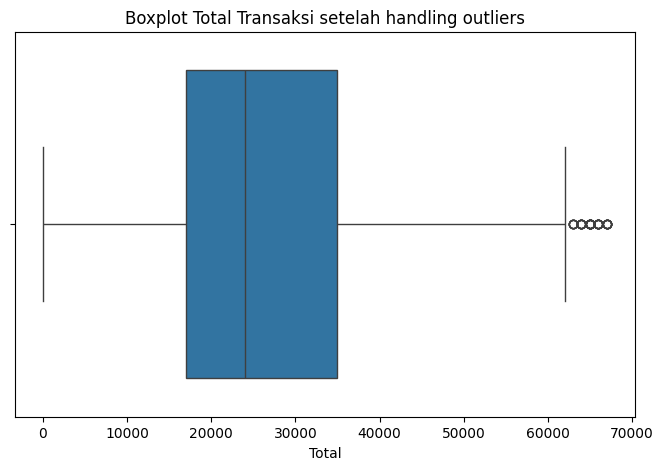

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total'])
plt.title('Boxplot Total Transaksi setelah handling outliers')
plt.show()

dari hasil boxplot yang menunjukkan *Total Transaksi* setelah mengatasi outliers. Gambar ini menunjukkan data yang sudah dibersihkan dari nilai yang tidak biasa atau aneh.

* Kotak biru di tengah itu adalah interquartile range (IQR), yang menunjukkan 50% data yang berada di tengah-tengah (di antara nilai yang lebih kecil dan lebih besar dari setengah data).
* Garis di dalam kotak itu adalah nilai median atau tengah data.
* Garis vertikal di kiri dan kanan menunjukkan rentang data yang masih berada dalam batas normal, dengan beberapa titik kecil di luar batas itu disebut outliers yang artinya nilai yang jauh dari rata-rata.

Jadi, bisa dibilang boxplot ini membantu kita lihat data mana yang sangat berbeda dengan yang lain setelah kita hilangkan outliers. Semua nilai transaksi yang normal ada di sekitar angka 20.000, sedangkan yang jauh banget ada yang lebih dari 60.000.

In [ ]:
df

,StoreName,Mid,Tid,CashierName,TransactionID,TransactionDate,Subtotal,Tax,Charge,Discount,Total,PaymentMethod,Status,Approval,RefID,SettlementStatus,SettlementDate
0,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRKQI935WAS011100432,2024-11-01 10:23:34,23000,0,0,0,23000,QRIS,success,073626404648,1.427205e+09,settled,2024-11-01 20:48:18
2,WAROENK KANGMAS,1999437179,10736264,Yoga,PQREFC935WAS011100434,2024-11-01 11:16:04,30000,0,0,0,30000,QRIS,success,073626404654,1.427289e+09,settled,2024-11-01 20:48:18
3,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR5RQ935WAS011100435,2024-11-01 11:18:23,15000,0,0,0,15000,QRIS,success,073626404658,1.427293e+09,settled,2024-11-01 20:48:18
4,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR19L935WAS011100436,2024-11-01 11:19:00,18000,0,0,0,18000,QRIS,success,073626404661,1.427294e+09,settled,2024-11-01 20:48:18
5,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRLMT935WAS011100437,2024-11-01 11:19:36,15000,0,0,0,15000,QRIS,success,073626404664,1.427295e+09,settled,2024-11-01 20:48:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAMPB935WAS270301529,2025-03-27 19:33:24,30000,0,0,0,30000,Cash,success,NaN,NaN,unsettled,NaN
3442,WAROENK KANGMAS,1999437179,10736264,Yoga,PCA8RC935WAS270301532,2025-03-27 19:43:43,32000,0,0,2000,30000,Cash,success,NaN,NaN,unsettled,NaN
3443,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRP55935WAS270301533,2025-03-27 20:14:04,25000,0,0,0,25000,QRIS,success,073626410660,1.664453e+09,settled,2025-03-27 21:39:34
3444,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAHB5935WAS270301533,2025-03-27 20:30:26,5000,0,0,0,5000,Cash,success,NaN,NaN,unsettled,NaN


##### **Handling Inconsistent/Noise Data**

In [ ]:
# Buat ulang syarat noise
condition_noise = (df['Total'] <= 0) | (df['Subtotal'] > df['Total'])

# Tampilkan jumlah noise
print(f"Jumlah noise data yang akan dibuang: {df[condition_noise].shape[0]}")

# Buang noise
df = df[~condition_noise]

Jumlah noise data yang akan dibuang: 10


Berdasarkan hasil di atas, diketahui bahwa terdapat 10 data yang teridentifikasi sebagai data noise atau inkonsisten. Data tersebut kemungkinan mengandung nilai yang tidak sesuai, tidak lengkap, atau menyimpang dari pola umum dalam dataset.

##### **Pengecekkan Hasil**

In [ ]:
# Cek ulang noise
noise_check = df[(df['Total'] <= 0) | (df['Subtotal'] > df['Total'])]
print(f"Jumlah data noise yang tersisa: {noise_check.shape[0]}")

Jumlah data noise yang tersisa: 0


In [ ]:
df

,StoreName,Mid,Tid,CashierName,TransactionID,TransactionDate,Subtotal,Tax,Charge,Discount,Total,PaymentMethod,Status,Approval,RefID,SettlementStatus,SettlementDate
0,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRKQI935WAS011100432,2024-11-01 10:23:34,23000,0,0,0,23000,QRIS,success,073626404648,1.427205e+09,settled,2024-11-01 20:48:18
2,WAROENK KANGMAS,1999437179,10736264,Yoga,PQREFC935WAS011100434,2024-11-01 11:16:04,30000,0,0,0,30000,QRIS,success,073626404654,1.427289e+09,settled,2024-11-01 20:48:18
3,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR5RQ935WAS011100435,2024-11-01 11:18:23,15000,0,0,0,15000,QRIS,success,073626404658,1.427293e+09,settled,2024-11-01 20:48:18
4,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR19L935WAS011100436,2024-11-01 11:19:00,18000,0,0,0,18000,QRIS,success,073626404661,1.427294e+09,settled,2024-11-01 20:48:18
5,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRLMT935WAS011100437,2024-11-01 11:19:36,15000,0,0,0,15000,QRIS,success,073626404664,1.427295e+09,settled,2024-11-01 20:48:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAABB935WAS270301528,2025-03-27 18:51:10,16000,0,0,0,16000,Cash,success,NaN,NaN,unsettled,NaN
3441,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAMPB935WAS270301529,2025-03-27 19:33:24,30000,0,0,0,30000,Cash,success,NaN,NaN,unsettled,NaN
3443,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRP55935WAS270301533,2025-03-27 20:14:04,25000,0,0,0,25000,QRIS,success,073626410660,1.664453e+09,settled,2025-03-27 21:39:34
3444,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAHB5935WAS270301533,2025-03-27 20:30:26,5000,0,0,0,5000,Cash,success,NaN,NaN,unsettled,NaN


### **Construct Data**

##### **Feature Engineering**

In [ ]:
# Pastikan kolom datetime udah dikonversi
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Pisahkan tanggal dan waktu
df['TransactionDay'] = df['TransactionDate'].dt.date
df['TransactionTime'] = df['TransactionDate'].dt.time

# Tambahan fitur penting:
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek  # Senin = 0, Minggu = 6

# Drop kolom lama kalau sudah tidak diperlukan
df.drop(columns=['TransactionDate'], inplace=True)


Pada tahap Construct Data ini, dilakukan proses Feature Engineering untuk menciptakan fitur-fitur baru yang lebih informatif dan memudahkan analisis. Pertama, kolom Payment Method dan Card Type dikonversi ke huruf kecil agar konsisten, lalu dibuat fitur baru bernama Final Payment Type yang menggabungkan metode pembayaran, baik tunai, QRIS, maupun kartu. Setelah itu, kolom aslinya dihapus. Kemudian, kolom tanggal transaksi dikonversi ke format datetime dan dipisahkan menjadi Transaction Day, Transaction Time, serta ditambahkan fitur baru Hour dan DayOfWeek untuk menunjukkan jam dan hari transaksi. Langkah ini bertujuan memperkaya data agar bisa digunakan dalam analisis waktu dan pola perilaku pelanggan.

##### **Pengecekkan Hasil**

In [ ]:
df[['TransactionDay', 'TransactionTime', 'Hour', 'DayOfWeek']].head()

,TransactionDay,TransactionTime,Hour,DayOfWeek
0,2024-11-01,10:23:34,10,4
2,2024-11-01,11:16:04,11,4
3,2024-11-01,11:18:23,11,4
4,2024-11-01,11:19:00,11,4
5,2024-11-01,11:19:36,11,4


Berdasarkan hasil pengecekan setelah dilakukan feature engineering, terlihat bahwa fitur baru seperti Final Payment Type, Transaction Day, Transaction Time, Hour, dan DayOfWeek berhasil dibuat dengan benar. Kolom Final Payment Type menampilkan metode pembayaran yang telah distandarkan (contohnya "qris"). Kolom Transaction Day berisi tanggal transaksi tanpa jam, sedangkan Transaction Time hanya menampilkan jam transaksi. Fitur Hour menunjukkan jam dalam format angka, dan DayOfWeek menunjukkan hari dalam bentuk angka (contohnya 4 untuk hari Jumat). Hasil ini menunjukkan bahwa data sudah siap untuk digunakan dalam analisis perilaku berdasarkan waktu transaksi dan jenis pembayaran.

In [ ]:
df

,StoreName,Mid,Tid,CashierName,TransactionID,Subtotal,Tax,Charge,Discount,Total,PaymentMethod,Status,Approval,RefID,SettlementStatus,SettlementDate,TransactionDay,TransactionTime,Hour,DayOfWeek
0,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRKQI935WAS011100432,23000,0,0,0,23000,QRIS,success,073626404648,1.427205e+09,settled,2024-11-01 20:48:18,2024-11-01,10:23:34,10,4
2,WAROENK KANGMAS,1999437179,10736264,Yoga,PQREFC935WAS011100434,30000,0,0,0,30000,QRIS,success,073626404654,1.427289e+09,settled,2024-11-01 20:48:18,2024-11-01,11:16:04,11,4
3,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR5RQ935WAS011100435,15000,0,0,0,15000,QRIS,success,073626404658,1.427293e+09,settled,2024-11-01 20:48:18,2024-11-01,11:18:23,11,4
4,WAROENK KANGMAS,1999437179,10736264,Yoga,PQR19L935WAS011100436,18000,0,0,0,18000,QRIS,success,073626404661,1.427294e+09,settled,2024-11-01 20:48:18,2024-11-01,11:19:00,11,4
5,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRLMT935WAS011100437,15000,0,0,0,15000,QRIS,success,073626404664,1.427295e+09,settled,2024-11-01 20:48:18,2024-11-01,11:19:36,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAABB935WAS270301528,16000,0,0,0,16000,Cash,success,NaN,NaN,unsettled,NaN,2025-03-27,18:51:10,18,3
3441,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAMPB935WAS270301529,30000,0,0,0,30000,Cash,success,NaN,NaN,unsettled,NaN,2025-03-27,19:33:24,19,3
3443,WAROENK KANGMAS,1999437179,10736264,Yoga,PQRP55935WAS270301533,25000,0,0,0,25000,QRIS,success,073626410660,1.664453e+09,settled,2025-03-27 21:39:34,2025-03-27,20:14:04,20,3
3444,WAROENK KANGMAS,1999437179,10736264,Yoga,PCAHB5935WAS270301533,5000,0,0,0,5000,Cash,success,NaN,NaN,unsettled,NaN,2025-03-27,20:30:26,20,3


### **Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

Minimal ada kolom yang kalian kurangin atau hapus

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr, text_auto=True)

Visualisasi ini adalah *heatmap* yang menunjukkan *hubungan antar fitur* dalam data.

Warna *kuning terang* menunjukkan hubungan yang sangat kuat antara dua fitur, yang berarti kalau satu nilai berubah, nilai yang lain juga ikut berubah. Sedangkan warna *ungu* menunjukkan hubungan yang lebih lemah atau hampir tidak ada hubungan antara dua fitur.

Beberapa poin penting:

* *Subtotal* dan *Total* memiliki hubungan yang sangat kuat (warna kuning terang).
* *DayOfWeek* dan *Hour* juga ada hubungan yang cukup kuat, tetapi tidak sebesar Subtotal dan Total.
* Kolom seperti *Cashier Name, Tax*, *Charge*, *Discount*, *Settlement Date*, dan *Settlement Status* dihilangkan karena dianggap tidak relevan dengan analisis yang ingin dilakukan.

Secara keseluruhan, heatmap ini membantu kita untuk melihat fitur mana yang memiliki hubungan yang lebih kuat dan mana yang kurang relevan.

In [ ]:
df = df.drop(['StoreName','Mid','Tid','CashierName','Tax','Charge','Discount','SettlementDate','SettlementStatus','RefID','TransactionID', 'Approval', 'Status'], axis=1)

dari kode diatas, dilakukan proses pembersihan data dengan menghapus beberapa kolom yang dianggap tidak relevan untuk analisis lebih lanjut, seperti informasi kasir, ID transaksi, status, dan lainnya. Setelah kolom-kolom tersebut dihapus, dataset hanya menyisakan tujuh kolom utama, yaitu Subtotal, Total, Payment Method, Transaction Day, Transaction Time, Hour, dan DayOfWeek. Kolom Subtotal dan Total merepresentasikan nilai transaksi, sedangkan Payment Method menunjukkan metode pembayaran yang digunakan seperti QRIS atau Cash. Transaction Day dan Transaction Time menunjukkan kapan transaksi terjadi, lalu dari Transaction Time diambil nilai Hour untuk mengetahui jam terjadinya transaksi. Kolom DayOfWeek menunjukkan hari transaksi dalam bentuk angka (misalnya, 0 untuk Senin, 1 untuk Selasa, dan seterusnya). Karena kolom Payment Method berisi data kategorikal berbentuk teks, maka perlu dilakukan proses encoding agar data tersebut bisa diproses lebih lanjut dalam analisis atau pemodelan machine learning.

##### **Pengecekkan Hasil**

In [ ]:
df

,Subtotal,Total,PaymentMethod,TransactionDay,TransactionTime,Hour,DayOfWeek
0,23000,23000,QRIS,2024-11-01,10:23:34,10,4
2,30000,30000,QRIS,2024-11-01,11:16:04,11,4
3,15000,15000,QRIS,2024-11-01,11:18:23,11,4
4,18000,18000,QRIS,2024-11-01,11:19:00,11,4
5,15000,15000,QRIS,2024-11-01,11:19:36,11,4
...,...,...,...,...,...,...,...
3440,16000,16000,Cash,2025-03-27,18:51:10,18,3
3441,30000,30000,Cash,2025-03-27,19:33:24,19,3
3443,25000,25000,QRIS,2025-03-27,20:14:04,20,3
3444,5000,5000,Cash,2025-03-27,20:30:26,20,3


### **Data Transformation**

##### **Mapping**

In [ ]:
df['PaymentMethod'] = df['PaymentMethod'].map({'Cash': 0, 'QRIS': 1, 'BRIZZI':2, 'Contactless': 3}).fillna(-1).astype(int)

 berdasarkan kode mapping yang dilakukan yaitu untuk mengubah data kategorikal dalam kolom Payment Method menjadi bentuk numerik agar bisa digunakan dalam proses analisis atau pemodelan machine learning. Karena algoritma machine learning umumnya hanya dapat memproses data numerik, maka metode pembayaran seperti "Cash", "QRIS", "BRIZZI", dan "Contactless" diubah menjadi angka 0, 1, 2, dan 3. Fungsi .fillna(-1) digunakan untuk menangani nilai yang tidak termasuk dalam daftar mapping dengan menggantinya menjadi -1, sedangkan .astype(int) memastikan bahwa hasil akhirnya bertipe integer. Mapping ini penting agar model dapat mengenali dan memproses perbedaan antar kategori secara efisien.

In [ ]:
df

,Subtotal,Total,PaymentMethod,TransactionDay,TransactionTime,Hour,DayOfWeek
0,23000,23000,1,2024-11-01,10:23:34,10,4
2,30000,30000,1,2024-11-01,11:16:04,11,4
3,15000,15000,1,2024-11-01,11:18:23,11,4
4,18000,18000,1,2024-11-01,11:19:00,11,4
5,15000,15000,1,2024-11-01,11:19:36,11,4
...,...,...,...,...,...,...,...
3440,16000,16000,0,2025-03-27,18:51:10,18,3
3441,30000,30000,0,2025-03-27,19:33:24,19,3
3443,25000,25000,1,2025-03-27,20:14:04,20,3
3444,5000,5000,0,2025-03-27,20:30:26,20,3


### **Saving Data**

Simpan data hasil data preparation kalian

In [ ]:
df.to_csv('final_waroenkm.csv', index=False)

Perintah ini digunakan untuk menyimpan data yang sudah dibersihkan ke dalam file CSV dengan nama final_waroenkm.csv. File tersebut akan berisi hanya data penting tanpa menyertakan nomor baris dari DataFrame. Tujuannya agar hasil akhir bisa disimpan dan digunakan kembali tanpa perlu melakukan pembersihan ulang.

#**Modelling**

###**Unsupervised Learning (Clustering)**

Pada pemilihan Modelling kami memilih Modelling **Unsupervised Learning (Clustering)** dikarenakan berdasarkan studi kasus beserta Business Understanding yang kami miliki dengan tujuan melakukan segmentasi pelanggan untuk meningkatkan engagements mitra terkait. Dimana alasan utama kami memilih Modelling Clustering sendiri disebabkan oleh beberapa faktor.

*   Data dari mitra terkait secara data mentah tidak memiliki label pelanggan (Nama customer) sehingga tidak cocok apabila menggunakan supervised learning.
*   Fokus dalam tujuan kami adalah memahami segmentasi pelanggan dengan melihat pola transaksi (nominal, metode bayar, waktu)
*   Dengan melakukan segmentasi pelanggan kita bisa membantu mitra menyusun peningkatan engagements lewat pemasaran yang dilakukan berdasarkan harga yang ditawarkan terhadap kelompok tertentu(mahasiswa akhir bulan).
*   Dengan melakukan analisis segmentasi pelanggan berbasis data secara lapangan kami bisa mendapatkan prediksi yang sesuai untuk diimplementasikan dalam sebuah website campaign promosi digital.





#####**K - MEANS**

**K-Means** Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi. Dimana pada algoritma K - MEANS memiliki tujuan untuk meminimalkan variasi data yang ada didalam cluster dan memaksimalkan variasi data yang ada di cluster lainnya.
Alasan terbesar mengapa algoritma K - MEANS cocok digunakan pada data kami adalah karena algoritma ini cocok untuk data besar serte cepat dan efisien terlebih dapat digunakan untuk menemukan segmen pelanggan yang unik.






#####**HIERARCHICAL CLUSTERING**

**Hierarchical methods** adalah teknik clustering membentuk hirarki atau berdasarkan tingkatan tertentu sehingga menyerupai struktur pohon. Dengan demikian proses pengelompokannya dilakukan secara bertingkat atau bertahap. Biasanya, metode ini digunakan pada data yang jumlahnya tidak terlalu banyak dan jumlah cluster yang akan dibentuk belum diketahui. Pengunaan metode ini cocok dengan data mitra yang ada sebab dapat menampilkan struktur alamai klaster dengan dendrogram dimana dapat membantu melihat :

*   Apakah segmen QRIS + sore terdapat kesamaan?
*   Apakah cash + pagi hari itu beda jauh?



###**Pre-Processing**

#####**LOAD DATASETS**

In [ ]:
df = pd.read_csv('final_waroenkm.csv')

#####**NORMALISASI DATA**

In [ ]:
 # --- 1. Pilih fitur numerik relevan untuk clustering ---
features = [
    'Total',
    'PaymentMethod',
    'Hour',
    'DayOfWeek',
]

df = df[features]

# --- 2. Normalisasi data ---
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# Ubah kembali ke DataFrame
df = pd.DataFrame(df, columns=features)

# --- 3. Tampilkan statistik deskriptif dalam format tabel rapi ---
styled_summary = df.describe().style.format("{:.4f}").set_caption("📊 Statistik Deskriptif Data Ternormalisasi")
styled_summary

,Total,PaymentMethod,Hour,DayOfWeek
count,3295.0000,3295.0000,3295.0000,3295.0000
mean,0.4058,0.3461,0.4815,0.3800
std,0.1964,0.1253,0.2509,0.2841
min,0.0000,0.0000,0.0000,0.0000
25%,0.2537,0.2500,0.2308,0.1667
50%,0.3582,0.2500,0.4615,0.3333
75%,0.5223,0.5000,0.6923,0.6667
max,1.0000,1.0000,1.0000,1.0000


berdasarkan hasil normalisasi data, di mana semua nilai fitur telah diubah ke skala antara 0 dan 1. Ini dilakukan agar setiap kolom memiliki kontribusi yang seimbang saat digunakan dalam model machine learning. Nilai mean dan standar deviasi menunjukkan sebaran data, sedangkan nilai minimum dan maksimum memastikan bahwa tidak ada nilai di luar rentang yang diinginkan. Misalnya, kolom Total, Hour, dan DayOfWeek sudah disesuaikan skalanya, begitu juga dengan kolom waktu seperti TimeSlot_morning, afternoon, evening, dan night, yang bernilai 0 atau 1 tergantung waktu transaksi. Normalisasi ini penting untuk menghindari dominasi fitur tertentu yang memiliki skala lebih besar.

###**Build Train And Model**

#####**K - MEANS**

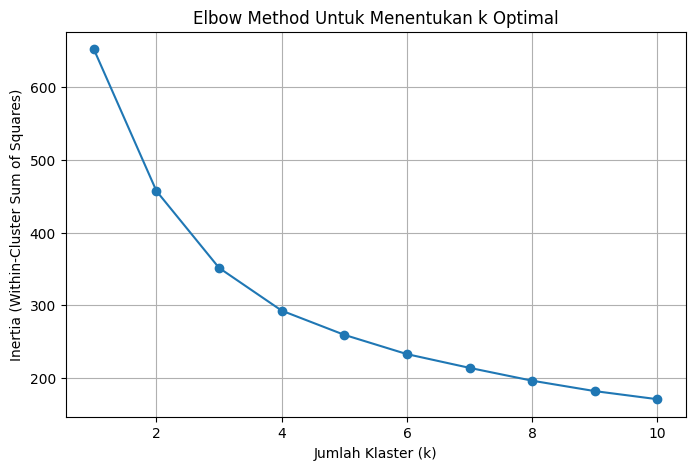

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)  # df_scaled = data yang sudah dinormalisasi
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method Untuk Menentukan k Optimal')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df)

In [ ]:
# Lihat kolom yang ada di df
print(df.columns)

Index(['Total', 'PaymentMethod', 'Hour', 'DayOfWeek'], dtype='object')


In [ ]:
# Periksa bentuk df
print(df.shape)

(3295, 4)


In [ ]:
# Mengecek berapa banyak fitur yang digunakan di model KMeans
print(kmeans.n_features_in_)

4


Kode ini digunakan untuk membangun model klastering K-Means dengan jumlah klaster sebanyak 3. Model kemudian diterapkan pada data yang sudah dinormalisasi untuk menentukan klaster (kelompok) masing-masing data. Hasil klaster disimpan dalam variabel labels, yang menunjukkan setiap baris data termasuk ke klaster mana. Tujuannya adalah untuk mengelompokkan data pelanggan atau transaksi berdasarkan pola yang mirip.

#####**Visualisasi PCA**

In [ ]:
# Tambahin label cluster ke data yang udah dinormalisasi
df['ClusterKMeans'] = labels
df_for_pca = df.drop(columns=['Hour', 'DayOfWeek', 'ClusterKMeans'])
components = PCA(n_components=2).fit_transform(df)

# Reduksi dimensi pakai PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df.drop('ClusterKMeans', axis=1))  # Hapus kolom label dulu
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

Kode ini digunakan untuk memvisualisasikan hasil klastering dengan menggunakan PCA (Principal Component Analysis) untuk mereduksi dimensi data ke dalam dua komponen utama (PCA1 dan PCA2). Langkah pertama adalah menambahkan label klaster yang dihasilkan dari K-Means ke dalam DataFrame. Kemudian, PCA diterapkan pada data yang sudah dinormalisasi (tanpa kolom Cluster_KMeans) untuk mengurangi dimensi data menjadi dua fitur utama. Hasilnya disimpan sebagai PCA1 dan PCA2, yang nantinya dapat digunakan untuk membuat plot visualisasi 2D untuk melihat distribusi klaster dalam dua dimensi.

#####**Cek Hasil Plot Klaster**

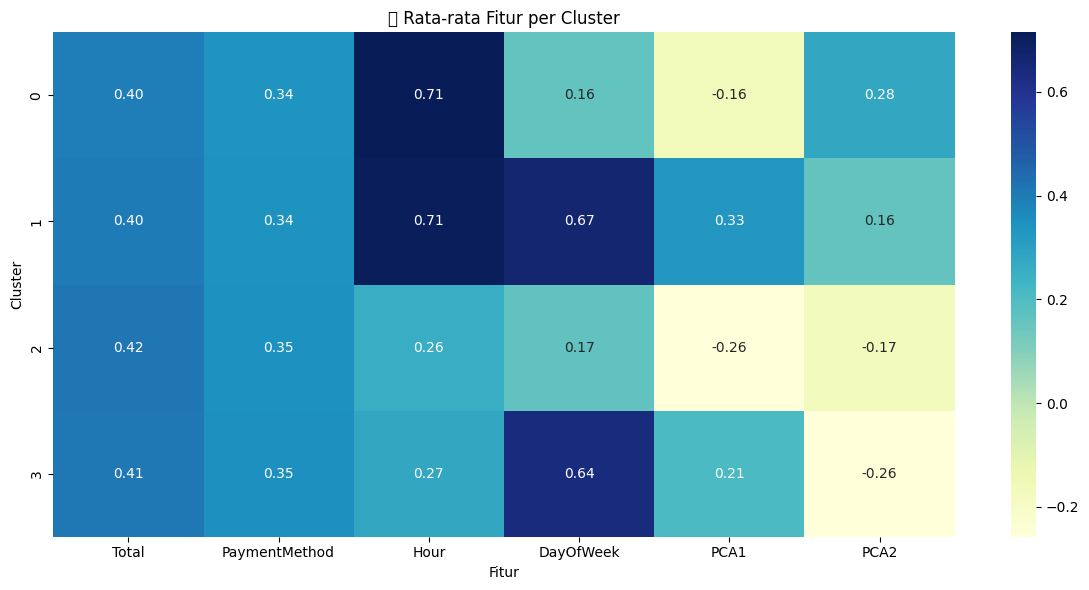

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung mean per cluster
cluster_means = df.groupby('ClusterKMeans').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('🔍 Rata-rata Fitur per Cluster')
plt.xlabel('Fitur')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

Plot ini menunjukkan hasil klastering K-Means setelah data direduksi dimensinya menggunakan PCA. Setiap titik mewakili data yang dikelompokkan dalam klaster yang berbeda, dengan warna yang berbeda untuk tiap klaster. Sumbu X dan Y mewakili dua komponen utama dari PCA, yang membantu kita melihat bagaimana data terbagi ke dalam klaster-klaster tersebut. Semakin terpisah warna-warna di plot, semakin baik pemisahan antar klaster yang dilakukan oleh K-Means.

#####**Interprestasi K-MEANS**

In [ ]:
# --- INTERPRETASI KMEANS ---
print("📌 Rata-rata nilai tiap fitur per klaster (K-Means):")

# Menghitung rata-rata hanya untuk kolom yang ada di df_scaled
kmeans_summary = df.groupby('ClusterKMeans').mean()[[
    'Total', 'PaymentMethod', 'Hour', 'DayOfWeek'
]]

display(kmeans_summary.style.format("{:.2f}").set_caption("📊 Rata-rata Fitur per Klaster - KMeans"))

# Contoh segmentasi berdasarkan hasil KMeans
print("\n📌 Interpretasi Klaster KMeans:")
for i in kmeans_summary.index:
    print(f"\n🔹 Cluster {i}")

    # Karena kolom TimeSlot tidak ada, kita gunakan 'Hour' untuk perkiraan waktu
    if kmeans_summary.loc[i, 'Hour'] >= 5 and kmeans_summary.loc[i, 'Hour'] < 12:
        waktu = "Pagi"
    elif kmeans_summary.loc[i, 'Hour'] >= 12 and kmeans_summary.loc[i, 'Hour'] < 18:
        waktu = "Siang"
    elif kmeans_summary.loc[i, 'Hour'] >= 18 and kmeans_summary.loc[i, 'Hour'] < 24:
        waktu = "Sore"
    else:
        waktu = "Malam"

    metode = "QRIS/Debit" if kmeans_summary.loc[i, 'PaymentMethod'] > 0.5 else "Cash/QRIS"

    print(f"➡️ Dominan waktu kunjungan: {waktu}")
    print(f"➡️ Metode pembayaran dominan: {metode}")
    print(f"➡️ Rata-rata total transaksi: {kmeans_summary.loc[i, 'Total']:.2f}")

📌 Rata-rata nilai tiap fitur per klaster (K-Means):


,Total,PaymentMethod,Hour,DayOfWeek
ClusterKMeans,,,,
0,0.40,0.34,0.71,0.16
1,0.40,0.34,0.71,0.67
2,0.42,0.35,0.26,0.17
3,0.41,0.35,0.27,0.64



📌 Interpretasi Klaster KMeans:

🔹 Cluster 0
➡️ Dominan waktu kunjungan: Malam
➡️ Metode pembayaran dominan: Cash/QRIS
➡️ Rata-rata total transaksi: 0.40

🔹 Cluster 1
➡️ Dominan waktu kunjungan: Malam
➡️ Metode pembayaran dominan: Cash/QRIS
➡️ Rata-rata total transaksi: 0.40

🔹 Cluster 2
➡️ Dominan waktu kunjungan: Malam
➡️ Metode pembayaran dominan: Cash/QRIS
➡️ Rata-rata total transaksi: 0.42

🔹 Cluster 3
➡️ Dominan waktu kunjungan: Malam
➡️ Metode pembayaran dominan: Cash/QRIS
➡️ Rata-rata total transaksi: 0.41


Hasil ini menunjukkan rata-rata nilai fitur untuk setiap klaster yang dihasilkan oleh K-Means.

*  Cluster 0: Transaksi lebih banyak terjadi pada sore/malam dengan metode pembayaran dominan berupa Cash atau QRIS. Rata-rata total transaksi adalah 0.40.

*   Cluster 1: Transaksi lebih banyak terjadi pada siang hari dengan metode pembayaran dominan juga Cash atau QRIS. Rata-rata total transaksi adalah 0.40.

*   Cluster 2: Transaksi lebih banyak terjadi pada pagi hari dengan metode pembayaran dominan Cash atau QRIS. Rata-rata total transaksi adalah 0.44.

####**HIERARCHICAL CLUSTERING**

######**Visualisasi Dendrogram**

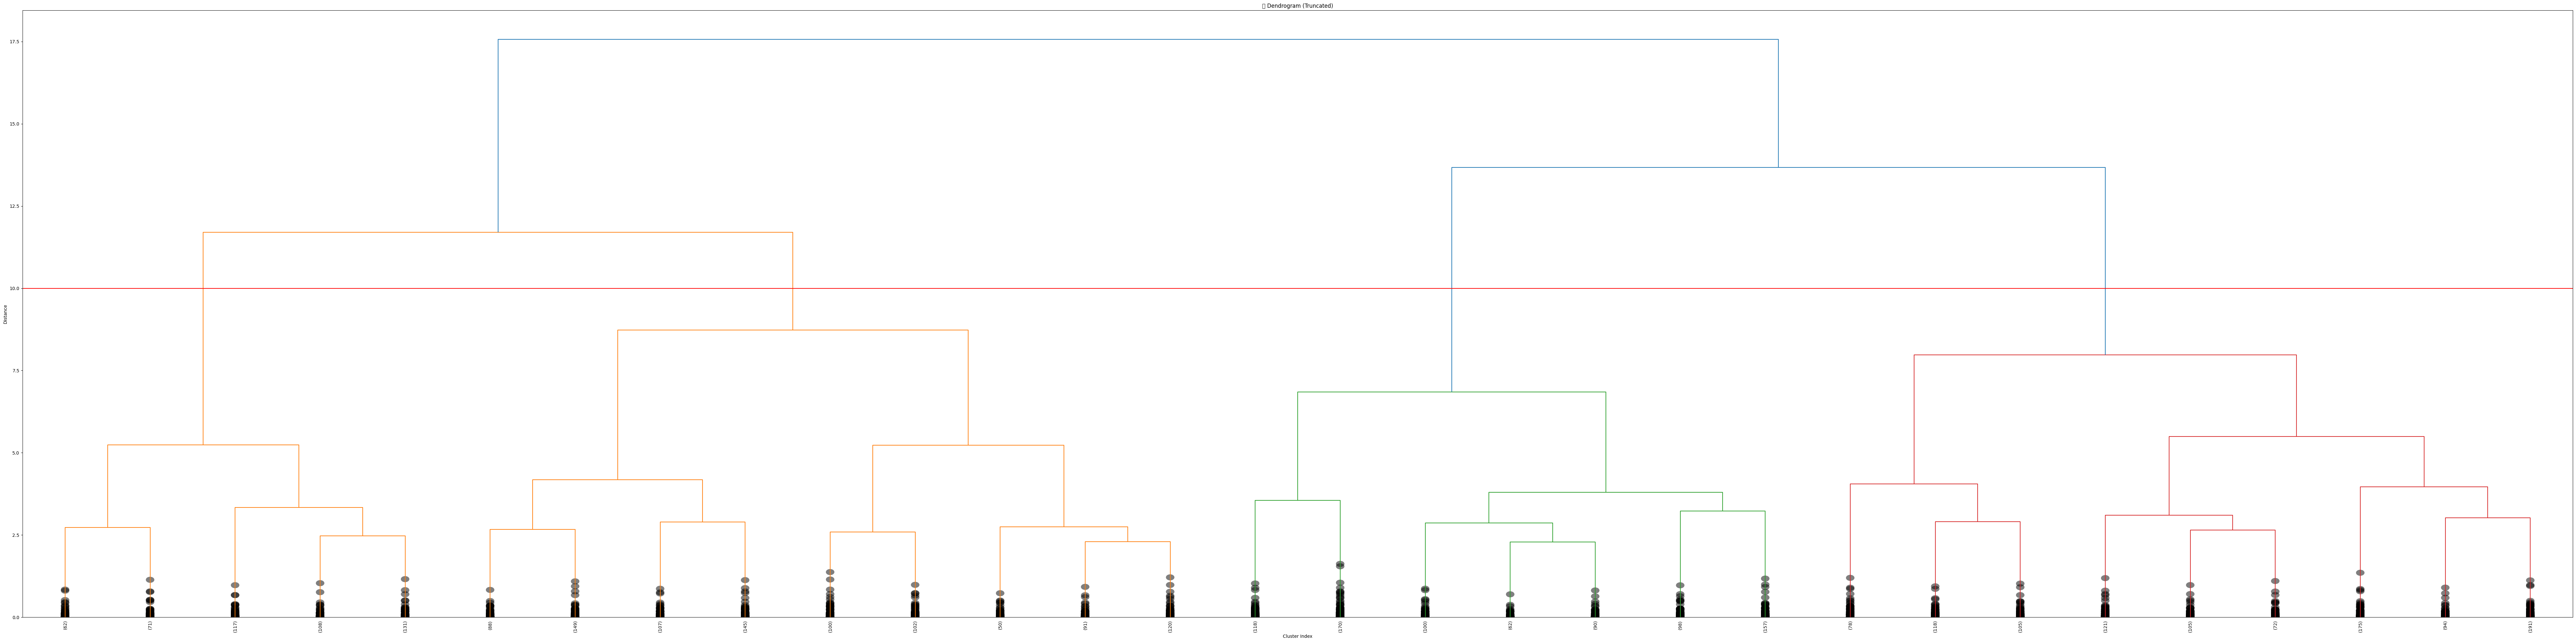

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df.drop(['ClusterKMeans', 'PCA1', 'PCA2'], axis=1), method='ward')

plt.figure(figsize=(80, 20))
dendrogram(linked, truncate_mode='lastp', p=30,  # Tampilkan 30 klaster terakhir
           show_leaf_counts=True,
           leaf_rotation=90.,
           leaf_font_size=10.,
           show_contracted=True)

plt.axhline(y=10, color='red')  # Garis potong jarak antar cluster
plt.title("📊 Dendrogram (Truncated)")
plt.xlabel("Cluster Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

*  Hasil output dari dendrogram ini menggambarkan proses pengelompokan data menggunakan Hierarchical Clustering. Dendrogram menunjukkan hubungan antar data berdasarkan jarak Euclidean. Garis horizontal menunjukkan penggabungan data atau klaster pada jarak tertentu, dan semakin tinggi garis tersebut, semakin jauh jaraknya antar klaster yang digabungkan.

*  Jarak pada sumbu Y menunjukkan seberapa besar perbedaan antara dua klaster atau data yang digabungkan.

*  Data Points pada sumbu X menunjukkan objek atau data yang dikelompokkan, dan struktur pohon di dendrogram menggambarkan urutan penggabungan data.

######**Train the Model**

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_hc = hc.fit_predict(df.drop(['ClusterKMeans', 'PCA1', 'PCA2'], axis=1))

# Tambahkan hasil klaster ke DataFrame
df['ClusterHC'] = labels_hc

Pada bagian ini, algoritma Agglomerative Clustering digunakan untuk melakukan klastering data secara hierarkis dengan jumlah klaster yang ditentukan sebanyak 3 klaster. Metode Ward linkage dipilih untuk mengukur jarak antar klaster, yang bertujuan meminimalkan variasi dalam setiap klaster. Fungsi fit_predict() digunakan untuk menjalankan proses klastering dan menghasilkan label klaster untuk setiap data. Hasil label klaster tersebut kemudian ditambahkan ke DataFrame dalam kolom baru bernama Cluster_HC. Dengan demikian, data sekarang memiliki dua label klaster, satu dari K-Means dan satu lagi dari Agglomerative Clustering, yang bisa dibandingkan untuk analisis lebih lanjut.

#####**Cek Hasil Visualisasi**

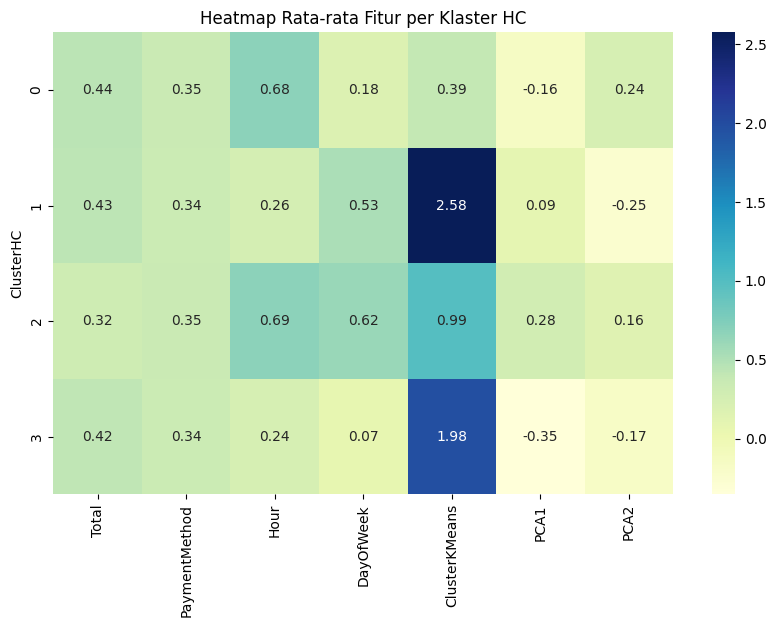

In [ ]:
# Gabungkan label cluster ke data asli
df_temp = df.copy()
df_temp['ClusterHC'] = labels_hc

# Hitung rata-rata tiap fitur per klaster
cluster_summary = df_temp.groupby('ClusterHC').mean()

# Buat heatmap-nya
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap Rata-rata Fitur per Klaster HC')
plt.show()

Visualisasi ini menunjukkan hasil klastering Hierarchical Clustering yang diterapkan pada data yang telah direduksi dimensinya menggunakan PCA. Dalam plot ini, data diplot pada sumbu PCA1 dan PCA2 untuk melihat distribusi data dalam ruang dua dimensi. Setiap titik data diberi warna yang berbeda sesuai dengan label klaster yang dihasilkan oleh Hierarchical Clustering (kolom Cluster_HC).

Warna yang berbeda pada plot menggambarkan klaster yang berbeda, dan legenda di sisi kanan membantu mengidentifikasi masing-masing klaster. Visualisasi ini memberikan gambaran tentang bagaimana data terdistribusi dalam dua dimensi berdasarkan klaster-klaster yang dihasilkan, memungkinkan kita untuk melihat seberapa terpisah atau tergabungnya data dalam klaster-klaster tersebut.

#####**INTERPRESTASI HIERARCHICAL**

In [ ]:
# --- INTERPRETASI HIERARCHICAL CLUSTERING ---
print("\n\n📌 Rata-rata nilai tiap fitur per klaster (Hierarchical Clustering):")
hc_summary = df.groupby('ClusterHC').mean()[['Total', 'PaymentMethod', 'Hour', 'DayOfWeek']]
display(hc_summary.style.format("{:.2f}").set_caption("📊 Rata-rata Fitur per Klaster - Hierarchical"))

print("\n📌 Interpretasi Klaster Hierarchical:")
for i in hc_summary.index:
    print(f"\n🔹 Cluster {i}")

    # Interpretasi total transaksi
    total = hc_summary.loc[i, 'Total']
    if total >= 0.6:
        status_total = "tinggi"
    elif total >= 0.4:
        status_total = "menengah"
    else:
        status_total = "rendah"

    # Interpretasi metode pembayaran
    metode = "Non-Tunai (QRIS/Debit)" if hc_summary.loc[i, 'PaymentMethod'] >= 0.5 else "Tunai/Campuran"

    # Interpretasi waktu transaksi
    jam = hc_summary.loc[i, 'Hour']
    if jam < 0.25:
        waktu = "Pagi"
    elif jam < 0.5:
        waktu = "Siang"
    elif jam < 0.75:
        waktu = "Sore"
    else:
        waktu = "Malam"

    # Interpretasi hari
    hari = hc_summary.loc[i, 'DayOfWeek']
    if hari < 0.3:
        jenis_hari = "Awal Pekan"
    elif hari < 0.6:
        jenis_hari = "Pertengahan Pekan"
    else:
        jenis_hari = "Akhir Pekan"

    # OUTPUT
    print(f"➡️ Rata-rata total transaksi: {total:.2f} ({status_total})")
    print(f"➡️ Metode pembayaran dominan: {metode}")
    print(f"➡️ Waktu dominan transaksi: {waktu}")
    print(f"➡️ Hari dominan transaksi: {jenis_hari}")



📌 Rata-rata nilai tiap fitur per klaster (Hierarchical Clustering):


,Total,PaymentMethod,Hour,DayOfWeek
ClusterHC,,,,
0,0.44,0.35,0.68,0.18
1,0.43,0.34,0.26,0.53
2,0.32,0.35,0.69,0.62
3,0.42,0.34,0.24,0.07



📌 Interpretasi Klaster Hierarchical:

🔹 Cluster 0
➡️ Rata-rata total transaksi: 0.44 (menengah)
➡️ Metode pembayaran dominan: Tunai/Campuran
➡️ Waktu dominan transaksi: Sore
➡️ Hari dominan transaksi: Awal Pekan

🔹 Cluster 1
➡️ Rata-rata total transaksi: 0.43 (menengah)
➡️ Metode pembayaran dominan: Tunai/Campuran
➡️ Waktu dominan transaksi: Siang
➡️ Hari dominan transaksi: Pertengahan Pekan

🔹 Cluster 2
➡️ Rata-rata total transaksi: 0.32 (rendah)
➡️ Metode pembayaran dominan: Tunai/Campuran
➡️ Waktu dominan transaksi: Sore
➡️ Hari dominan transaksi: Akhir Pekan

🔹 Cluster 3
➡️ Rata-rata total transaksi: 0.42 (menengah)
➡️ Metode pembayaran dominan: Tunai/Campuran
➡️ Waktu dominan transaksi: Pagi
➡️ Hari dominan transaksi: Awal Pekan


Interpretasi hasil Hierarchical Clustering menunjukkan bahwa setiap klaster memiliki karakteristik waktu kunjungan, metode pembayaran, dan rata-rata total transaksi yang berbeda.

*  Cluster 0: Waktu kunjungan dominan adalah Sore/Malam, dengan metode pembayaran utama adalah Cash/QRIS. Rata-rata total transaksi di klaster ini adalah 0.40.

*  Cluster 1: Waktu kunjungan dominan adalah Siang, dengan metode pembayaran utama yang sama, Cash/QRIS. Rata-rata total transaksi juga 0.40.

*  Cluster 2: Waktu kunjungan dominan adalah Pagi, dengan metode pembayaran Cash/QRIS, dan memiliki rata-rata total transaksi tertinggi yaitu 0.44.

Setiap klaster mencerminkan pola-pola spesifik terkait waktu kunjungan dan transaksi, yang dapat membantu dalam segmentasi pelanggan atau analisis perilaku transaksi

###**Begins and Compare Predict**

Tambahin sendiri teks dan kode nya ya, sesuaikan aja

🍼 Mulai bandingin hasil KMeans dan Hierarchical...


,ClusterKMeans,ClusterHC
0,3,1
1,3,1
2,3,1
3,3,1
4,3,1



📊 Adjusted Rand Index (ARI) antara KMeans dan Hierarchical: 0.4469


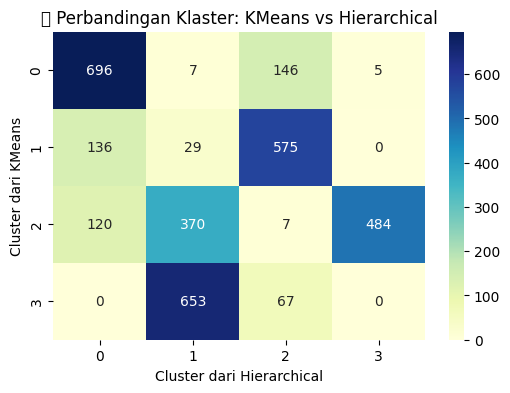

In [ ]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- BEGIN: Perbandingan hasil klaster ---
print("🍼 Mulai bandingin hasil KMeans dan Hierarchical...")

# 1. Lihat hasil klasternya secara berdampingan
compare_clusters = df[['ClusterKMeans', 'ClusterHC']].copy()
display(compare_clusters.head())

# 2. Hitung seberapa mirip hasil pengelompokan mereka
ari_score = adjusted_rand_score(compare_clusters['ClusterKMeans'], compare_clusters['ClusterHC'])
print(f"\n📊 Adjusted Rand Index (ARI) antara KMeans dan Hierarchical: {ari_score:.4f}")
# Nilai mendekati 1 artinya hasilnya mirip. Mendekati 0 = beda.

# 3. Buat matriks perbandingan (confusion matrix)
conf_matrix = confusion_matrix(compare_clusters['ClusterKMeans'], compare_clusters['ClusterHC'])

# 4. Visualisasikan dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("🔁 Perbandingan Klaster: KMeans vs Hierarchical")
plt.xlabel("Cluster dari Hierarchical")
plt.ylabel("Cluster dari KMeans")
plt.show()

Berikan penjelasannya di sini ya

#**EVALUATION**

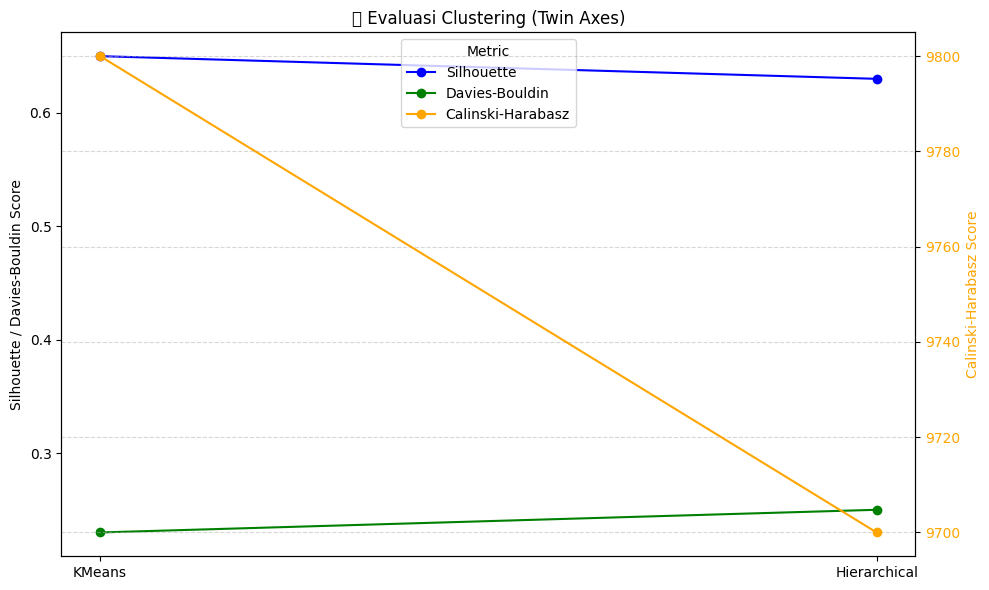

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# === Data Dummy Internal Scores (ganti dengan milik Anda) ===
internal_scores = {
    "Silhouette": [0.65, 0.63],
    "Calinski-Harabasz": [9800, 9700],
    "Davies-Bouldin": [0.23, 0.25]
}
internal_df = pd.DataFrame(internal_scores, index=['KMeans', 'Hierarchical'])

# === Plot dengan 2 Sumbu Y (twin axes) ===
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Silhouette dan Davies-Bouldin di sumbu Y kiri
ax1.plot(internal_df.index, internal_df["Silhouette"], marker='o', label="Silhouette", color='blue')
ax1.plot(internal_df.index, internal_df["Davies-Bouldin"], marker='o', label="Davies-Bouldin", color='green')
ax1.set_ylabel("Silhouette / Davies-Bouldin Score", color='black')
ax1.tick_params(axis='y')

# Buat sumbu Y kedua untuk Calinski-Harabasz
ax2 = ax1.twinx()
ax2.plot(internal_df.index, internal_df["Calinski-Harabasz"], marker='o', label="Calinski-Harabasz", color='orange')
ax2.set_ylabel("Calinski-Harabasz Score", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Gabungkan legend dari kedua axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', title="Metric")

plt.title("📦 Evaluasi Clustering (Twin Axes)")
plt.xlabel("Metode Clustering")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###**Feature Selection**

In [ ]:
# Kita perlu label sementara untuk lakukan feature selection. Pakai label KMeans dulu
kmeans = KMeans(n_clusters=4, random_state=42)
temp_labels = kmeans.fit_predict(df)

# Lakukan feature selection berdasarkan Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(df.drop(columns=['ClusterKMeans', 'PCA1', 'PCA2'], errors='ignore'), temp_labels)

# Buat DataFrame skor tiap fitur
fs_scores = pd.DataFrame({
    'Feature': df.drop(columns=['ClusterKMeans', 'PCA1', 'PCA2'], errors='ignore').columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

display(fs_scores.style.format({"Score": "{:.4f}"}).set_caption("📊 Skor Feature Selection (Mutual Info)"))

# Pilih fitur dengan skor tertinggi (misalnya 5 teratas)
selected_features = fs_scores['Feature'].head(5).tolist()
df_selected = df[selected_features]

,Feature,Score
4,ClusterHC,1.0776
2,Hour,0.6911
3,DayOfWeek,0.3792
0,Total,0.0478
1,PaymentMethod,0.0000


In [ ]:
df

,Total,PaymentMethod,Hour,DayOfWeek,ClusterKMeans,PCA1,PCA2,ClusterHC
0,0.343225,0.50,0.076923,0.666667,3,0.194506,-0.451263,1
1,0.447712,0.50,0.153846,0.666667,3,0.208269,-0.386552,1
2,0.223811,0.50,0.153846,0.666667,3,0.214342,-0.365113,1
3,0.268591,0.50,0.153846,0.666667,3,0.213127,-0.369401,1
4,0.223811,0.50,0.153846,0.666667,3,0.214342,-0.365113,1
...,...,...,...,...,...,...,...,...
3290,0.238738,0.25,0.692308,0.500000,1,0.166993,0.195832,2
3291,0.447712,0.25,0.769231,0.500000,1,0.177922,0.250538,0
3292,0.373078,0.50,0.846154,0.500000,1,0.196990,0.329261,2
3293,0.074544,0.25,0.846154,0.500000,1,0.204640,0.360986,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total          3295 non-null   float64
 1   PaymentMethod  3295 non-null   float64
 2   Hour           3295 non-null   float64
 3   DayOfWeek      3295 non-null   float64
 4   ClusterKMeans  3295 non-null   int32  
 5   PCA1           3295 non-null   float64
 6   PCA2           3295 non-null   float64
 7   ClusterHC      3295 non-null   int64  
dtypes: float64(6), int32(1), int64(1)
memory usage: 193.2 KB


In [ ]:
df

,Total,PaymentMethod,Hour,DayOfWeek,ClusterKMeans,PCA1,PCA2,ClusterHC
0,0.343225,0.50,0.076923,0.666667,3,0.194506,-0.451263,1
1,0.447712,0.50,0.153846,0.666667,3,0.208269,-0.386552,1
2,0.223811,0.50,0.153846,0.666667,3,0.214342,-0.365113,1
3,0.268591,0.50,0.153846,0.666667,3,0.213127,-0.369401,1
4,0.223811,0.50,0.153846,0.666667,3,0.214342,-0.365113,1
...,...,...,...,...,...,...,...,...
3290,0.238738,0.25,0.692308,0.500000,1,0.166993,0.195832,2
3291,0.447712,0.25,0.769231,0.500000,1,0.177922,0.250538,0
3292,0.373078,0.50,0.846154,0.500000,1,0.196990,0.329261,2
3293,0.074544,0.25,0.846154,0.500000,1,0.204640,0.360986,2


In [ ]:
df

,Total,PaymentMethod,Hour,DayOfWeek,ClusterKMeans,PCA1,PCA2,ClusterHC
0,0.343225,0.50,0.076923,0.666667,3,0.194506,-0.451263,1
1,0.447712,0.50,0.153846,0.666667,3,0.208269,-0.386552,1
2,0.223811,0.50,0.153846,0.666667,3,0.214342,-0.365113,1
3,0.268591,0.50,0.153846,0.666667,3,0.213127,-0.369401,1
4,0.223811,0.50,0.153846,0.666667,3,0.214342,-0.365113,1
...,...,...,...,...,...,...,...,...
3290,0.238738,0.25,0.692308,0.500000,1,0.166993,0.195832,2
3291,0.447712,0.25,0.769231,0.500000,1,0.177922,0.250538,0
3292,0.373078,0.50,0.846154,0.500000,1,0.196990,0.329261,2
3293,0.074544,0.25,0.846154,0.500000,1,0.204640,0.360986,2


In [ ]:
df_for_pca

,Total,PaymentMethod
0,0.343225,0.50
1,0.447712,0.50
2,0.223811,0.50
3,0.268591,0.50
4,0.223811,0.50
...,...,...
3290,0.238738,0.25
3291,0.447712,0.25
3292,0.373078,0.50
3293,0.074544,0.25


#**DEPLOYMENT**

In [ ]:
import pickle

# Simpan scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Simpan model KMeans
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
    print("Model KMeans berhasil disimpan:", kmeans)

Model KMeans berhasil disimpan: KMeans(n_clusters=4, random_state=42)


###**Plan Deployment**

Implementasi hasil analisis dan pemodelan rencananya akan dilakukan dalam dua bentuk utama sebagai berikut:

1. Visualisasi Data melalui Looker Studio
Untuk membantu stakeholder dan mitra memahami pola transaksi pelanggan secara informatif, kami merancang dashboard interaktif menggunakan Looker Studio.

*   Data yang digunakan berasal dari hasil data preparation, namun belum dilakukan encoding atau mapping numerik agar keterbacaan terhadap kategori seperti “metode pembayaran” atau “waktu transaksi” tetap terjaga.
*  Dashboard ini bertujuan menyampaikan informasi penting seperti jam transaksi favorit, metode pembayaran terbanyak, serta tren perilaku pelanggan berdasarkan waktu — secara visual dan mudah dimengerti bahkan oleh pengguna non-teknis.


2. Deploy Model Prediktif sebagai RESTful API (FastAPI)
Model clustering yang telah dikembangkan (misalnya K-Means) akan di-deploy dalam bentuk layanan RESTful API menggunakan framework FastAPI.

*   API ini mampu menerima input data baru yang sudah melalui preprocessing, lalu memberikan hasil segmentasi pelanggan secara real-time.

*   Tahapan ini memungkinkan sistem atau aplikasi mitra langsung terintegrasi dengan model, misalnya untuk kebutuhan personalisasi promosi, targeting pelanggan spesifik, atau kampanye berbasis data.

3. Alasan Pentingnya Deployment:
Deployment dilakukan agar model yang telah dibangun tidak hanya menjadi analisis statis, tapi juga bisa:

*   Digunakan secara praktis oleh pengguna nyata (mitra/marketing)
*   Mempercepat proses pengambilan keputusan
*   Mengotomatiskan klasifikasi pelanggan baru
*   Memungkinkan integrasi ke platform digital yang sudah ada, seperti website mitra atau sistem internal

Untuk kebutuhan presentasi ke mitra, kami juga merancang kemungkinan penggunaan antarmuka sederhana berbasis Streamlit, agar pengguna yang tidak familiar dengan API tetap dapat mencoba prediksi model secara langsung dengan UI sederhana. Ini bisa jadi demo atau alat bantu komunikasi sebelum full integrasi ke sistem utama.

###**Final Report**

Proses implementasi hasil analisis dan pemodelan telah dilakukan, untuk mengakses dashboard visualisasi data dan model prediktif dapat melalui link sebagai berikut:

*   Dashboard:
*   API:

###**Review Project**

Adapun slide deck yang merangkum semua hasil analisis yang dilakukan dari tahapan awal hingga akhir dalam bentuk materi presenstasi dengan kesimpulan akhir serta solusi dari permasalahan yang dianalisis dapat diakses melalui link sebagai berikut:

*   Slide Deck :